In [30]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import statsmodels.api as sm

In [31]:
AAPL = yf.download('AAPL',dt.datetime.today()-dt.timedelta(3650),dt.datetime.today())

[*********************100%%**********************]  1 of 1 completed


In [32]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-10,18.870001,19.047501,18.869286,18.961430,16.701523,178584000
2014-03-11,19.123215,19.240713,19.021070,19.146070,16.864153,279224400
2014-03-12,19.089643,19.191071,19.000000,19.164642,16.880508,199326400
2014-03-13,19.194286,19.273571,18.898571,18.951786,16.693026,257742800
2014-03-14,18.885357,18.960358,18.678572,18.738930,16.505529,237199200


In [33]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900
2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81406300


In [34]:
import talib

In [35]:
# 假设 'AAPL' 是一个包含股票数据的 DataFrame
Close = AAPL['Close']  # 假设 'Close' 是 DataFrame 中的一列

# 计算 RSI 值并存储在变量中
rsi = talib.RSI(Close, 14)  # 计算 RSI 值，时序默认为 14

# 在 DataFrame 中创建一个名为 'RSI' 的新列
AAPL['RSI'] = rsi

In [41]:
# 假设 'AAPL' 是一个包含股票数据的 DataFrame
Close = AAPL['Close']  # 假设 'Close' 是 DataFrame 中的一列

# 计算 50 日移动平均值并将其存储在变量中
ma50 = talib.MA(Close, 50)  # 计算 MA 值，时间周期为 50

# 创建一个名为 'MA50' 的新列并赋值整个数组
AAPL['MA50'] = ma50

In [43]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50
Date,,,,,,,,
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900,41.924688,188.389600
2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900,39.421114,188.055800
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600,38.065631,187.719399
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000,35.902767,187.394799
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81406300,28.585267,186.958000


In [48]:
# 假设 'AAPL' 是一个包含股票数据的 DataFrame
Close = AAPL['Close']  # 假设 'Close' 是 DataFrame 中的一列

# 计算 200动平均值并将其存储在变量中
ma200 = talib.MA(Close, 200) # 计算 MA 值，时间周期为 200

# 创建一个名为 'MA200新列并赋值整个数组
AAPL['MA200'] = ma200

In [49]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA200
Date,,,,,,,,,
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900,41.924688,188.389600,183.82495
2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900,39.421114,188.055800,183.86330
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600,38.065631,187.719399,183.90420
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000,35.902767,187.394799,183.94215
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81406300,28.585267,186.958000,183.95730


In [50]:
AAPL['signal'] = AAPL.MA50 > AAPL.MA200

In [51]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA200,signal
Date,,,,,,,,,,
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900,41.924688,188.389600,183.82495,True
2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900,39.421114,188.055800,183.86330,True
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600,38.065631,187.719399,183.90420,True
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000,35.902767,187.394799,183.94215,True
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81406300,28.585267,186.958000,183.95730,True


<Axes: xlabel='Date'>

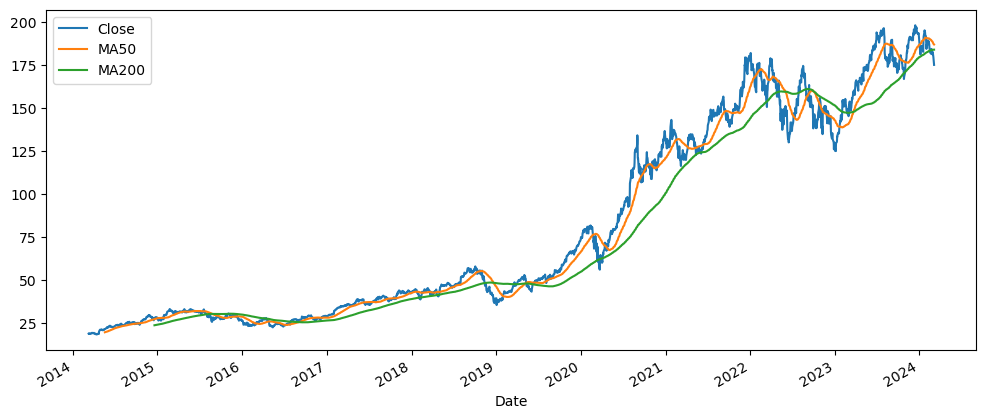

In [53]:
AAPL[['Close','MA50','MA200']].plot(figsize = [12,5])

<Axes: xlabel='Date'>

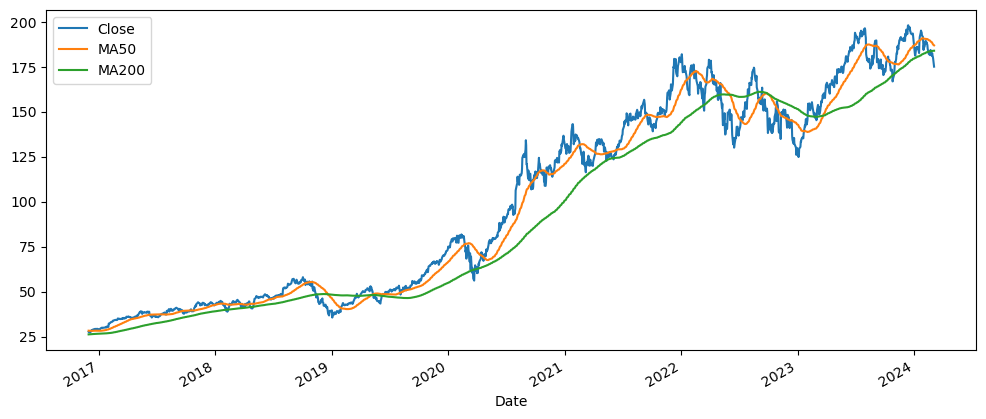

In [55]:
AAPL[['Close','MA50','MA200']].iloc[-365*5:,].plot(figsize = [12,5])